In [4]:
predictions = torch.nn.functional.softmax(logits, dim=-1)
print(logits, predictions)

tensor([[-2.3712],
        [-2.3293],
        [-2.2873],
        [-2.2454],
        [-2.2034],
        [-2.1614],
        [-2.1195],
        [-2.0775],
        [-2.0356],
        [-1.9936],
        [-1.9517],
        [-1.9097],
        [-1.8677],
        [-1.8258],
        [-1.7838],
        [-1.7419],
        [-1.6999],
        [-1.6580],
        [-1.6160],
        [-1.5740],
        [-1.5321],
        [-1.4901],
        [-1.4482],
        [-1.4062],
        [-1.3643],
        [-1.3223],
        [-1.2803],
        [-1.2384],
        [-1.1964],
        [-1.1545],
        [-1.1125],
        [-1.0706],
        [-1.0286],
        [-0.9866],
        [-0.9447],
        [-0.9027],
        [-0.8608],
        [-0.8188],
        [-0.7769],
        [-0.7349],
        [-0.6929],
        [-0.6510],
        [-0.6090],
        [-0.5671],
        [-0.5251],
        [-0.4831],
        [-0.4412],
        [-0.3992],
        [-0.3573],
        [-0.3153],
        [-0.2734],
        [-0.2314],
        [-0.

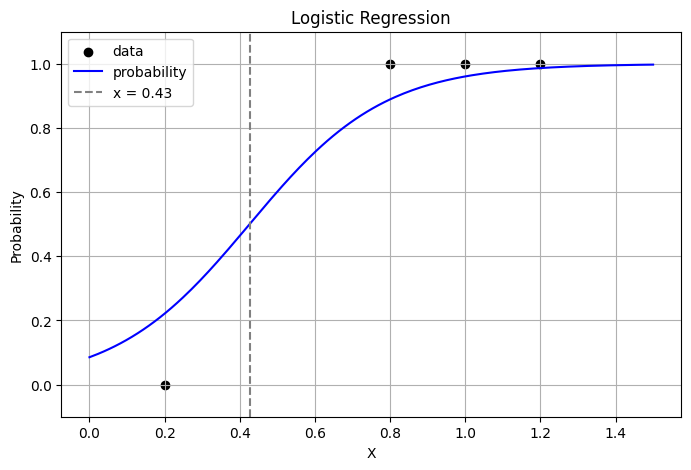

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Data
X = torch.tensor([[0.2], [0.8], [1.0], [1.2]], dtype=torch.float32)
Y = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32)

# Model
class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
    def forward(self, x):
        return self.linear(x)

model = LogisticRegression()

# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training
for epoch in range(1000):
    y_pred = model(X)
    loss = criterion(y_pred, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Prediction and decision boundary
with torch.no_grad():
    x_test = torch.linspace(0, 1.5, steps=200).reshape(-1, 1)
    logits = model(x_test)
    probs = torch.sigmoid(logits)

    w = model.linear.weight.item()
    b = model.linear.bias.item()
    x_boundary = -b / w

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X.numpy(), Y.numpy(), label="data", color='black')
plt.plot(x_test.numpy(), probs.numpy(), label="probability", color='blue')
plt.axvline(x_boundary, color='gray', linestyle='--', label=f"x = {x_boundary:.2f}")

plt.xlabel("X")
plt.ylabel("Probability")
plt.title("Logistic Regression")
plt.legend()
plt.grid(True)
plt.ylim(-0.1, 1.1)
plt.savefig("Classfication.png", dpi = 300)
plt.show()